In [83]:
import json, os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [93]:
def running_mean(x, window_size=11):
  k = np.ones(window_size) / window_size
  print x.shape, k.shape
  return np.convolve(x, k, mode='same')

def view_checkpoint(path):
  with open(path, 'r') as f:
    checkpoint = json.load(f)
  loss = np.asarray(checkpoint['loss_history']).squeeze()
  plt.subplot(1, 2, 1)
  plt.plot(loss, 'o')
  plt.plot(running_mean(loss), '-', lw=3)
  # plt.gca().set_ylim([0.8, 1.5])
  plt.subplot(1, 2, 2)
  acc_ts = np.asarray(checkpoint['acc_ts'])
  train_acc = np.asarray(checkpoint['train_acc_history'])
  val_acc = np.asarray(checkpoint['val_acc_history'])
  plt.plot(acc_ts, train_acc, 'o')
  plt.plot(acc_ts, running_mean(train_acc, 3), '-', label='train')
  plt.plot(acc_ts, val_acc, 'o')
  plt.plot(acc_ts, running_mean(val_acc, 3), '-', label='val')
  plt.gca().set_ylim([0.6, 1.0])
  plt.legend()
  plt.gcf().set_size_inches(14, 4)
  plt.show()
  
view_checkpoint('data/checkpoint.json')

IOError: [Errno 2] No such file or directory: 'data/checkpoint.json'

res50_1.json
(1000,) (11,)
(10,) (3,)
(10,) (3,)


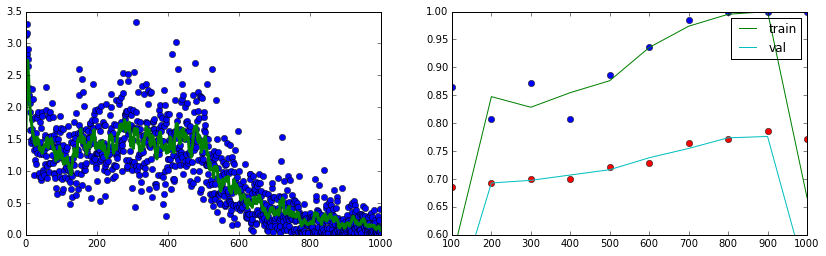

res50_2.json
(2000,) (11,)
(20,) (3,)
(20,) (3,)


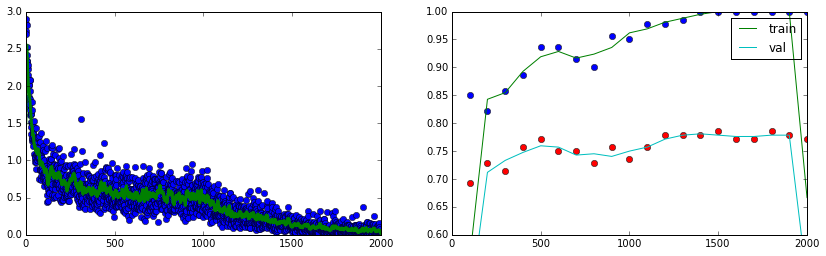

res50_3.json
(1100,) (11,)
(11,) (3,)
(11,) (3,)


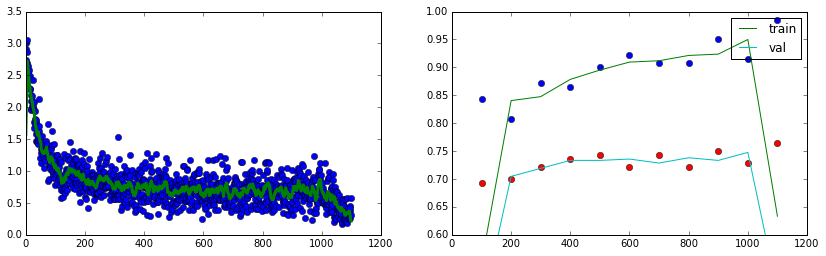

v1.json
(900,) (11,)
(9,) (3,)
(9,) (3,)


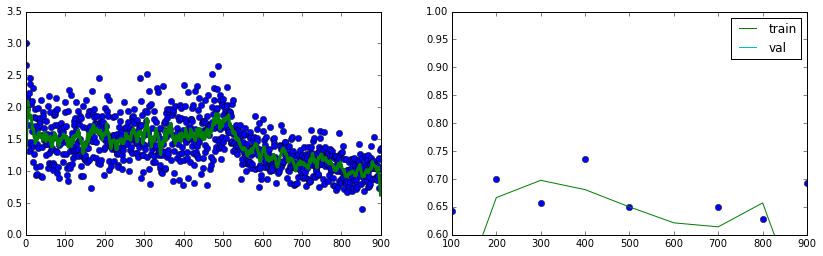

v10.json
(1000,) (11,)
(10,) (3,)
(10,) (3,)


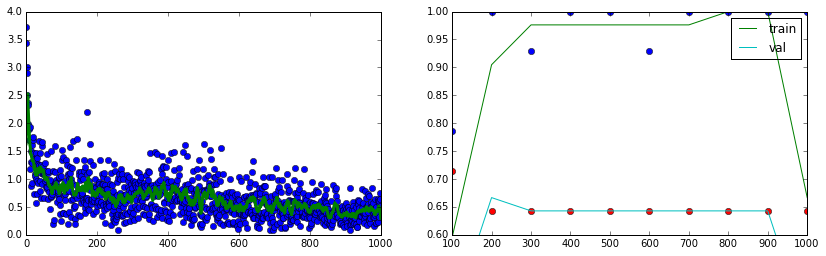

v2.json
(1600,) (11,)
(16,) (3,)
(16,) (3,)


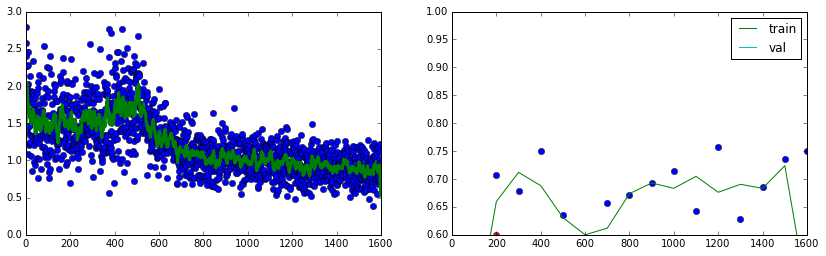

v3.json
(1700,) (11,)
(17,) (3,)
(17,) (3,)


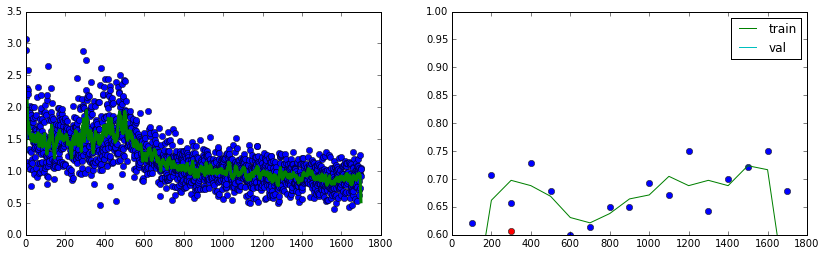

v4.json
(500,) (11,)
(5,) (3,)
(5,) (3,)


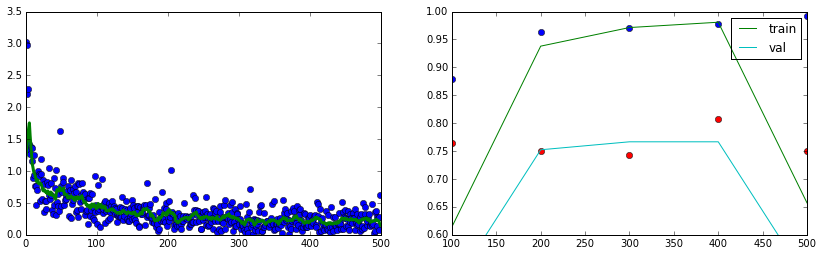

v5.json
(600,) (11,)
(6,) (3,)
(6,) (3,)


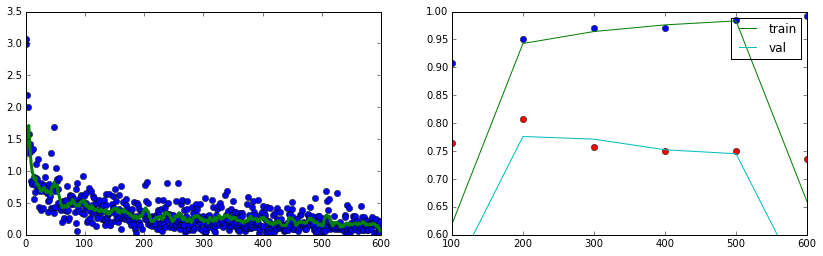

v6.json
(1000,) (11,)
(10,) (3,)
(10,) (3,)


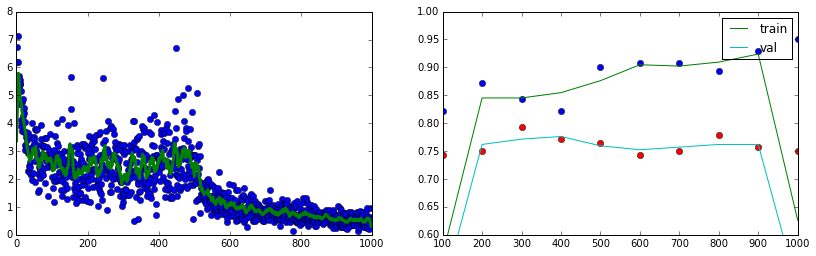

v7.json
(1100,) (11,)
(11,) (3,)
(11,) (3,)


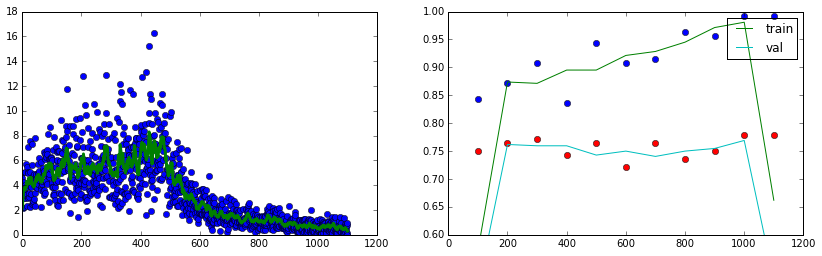

v8.json
(6800,) (11,)
(68,) (3,)
(68,) (3,)


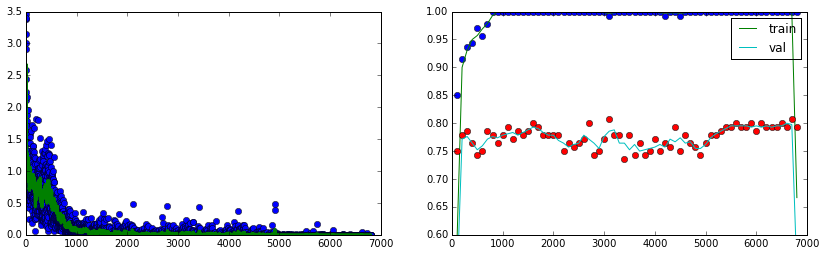

v9.json
(6000,) (11,)
(60,) (3,)
(60,) (3,)


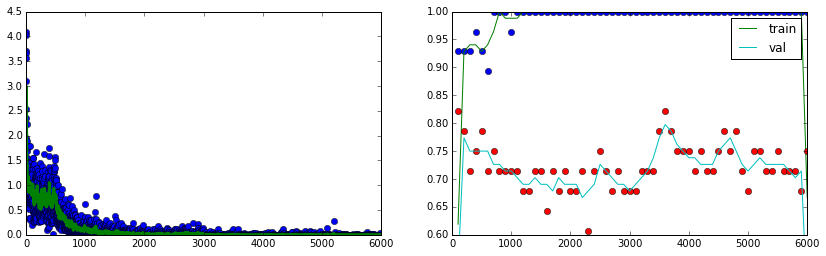

In [112]:
checkpoint_dir = 'data/cv_3_22'
for fn in os.listdir(checkpoint_dir):
  if not fn.endswith('.json'): continue
  print fn
  view_checkpoint(os.path.join(checkpoint_dir, fn))